In [4]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = '/content/Crudeoil.csv'  # Replace 'path_to_your_file.csv' with the actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data
print(df.head())

# Assuming 'Date' column contains dates and 'Production' column contains production values

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])




         Date       Open       High        Low      Close  Adj Close  Volume
0  2022-11-25  77.510002  79.900002  76.220001  76.279999  76.279999  266451
1  2022-11-28  75.930000  77.839996  73.599998  77.239998  77.239998  405033
2  2022-11-29  76.540001  79.650002  76.290001  78.199997  78.199997  381869
3  2022-11-30  79.000000  81.379997  78.400002  80.550003  80.550003  287534
4  2022-12-01  80.400002  83.339996  79.930000  81.220001  81.220001  321432


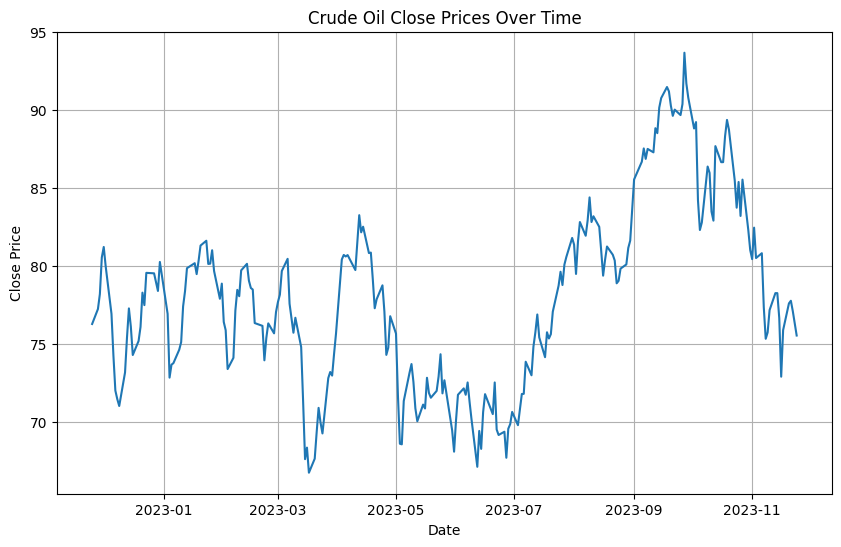

In [11]:
import matplotlib.pyplot as plt

# Plotting the 'Close' prices over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Crude Oil Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


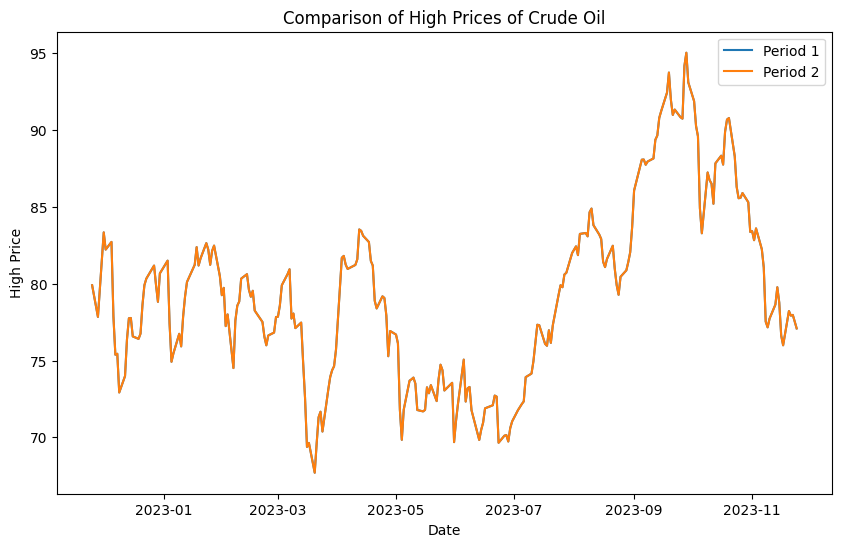

In [13]:
import matplotlib.pyplot as plt

# Assuming df1 and df2 are two DataFrames with crude oil data for comparison
# For example, df1 represents one period, and df2 represents another period or another type of crude oil

plt.figure(figsize=(10, 6))

plt.plot(df['Date'], df['High'], label='Period 1')
plt.plot(df['Date'], df['High'], label='Period 2')

plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('Comparison of High Prices of Crude Oil')
plt.legend()
plt.show()


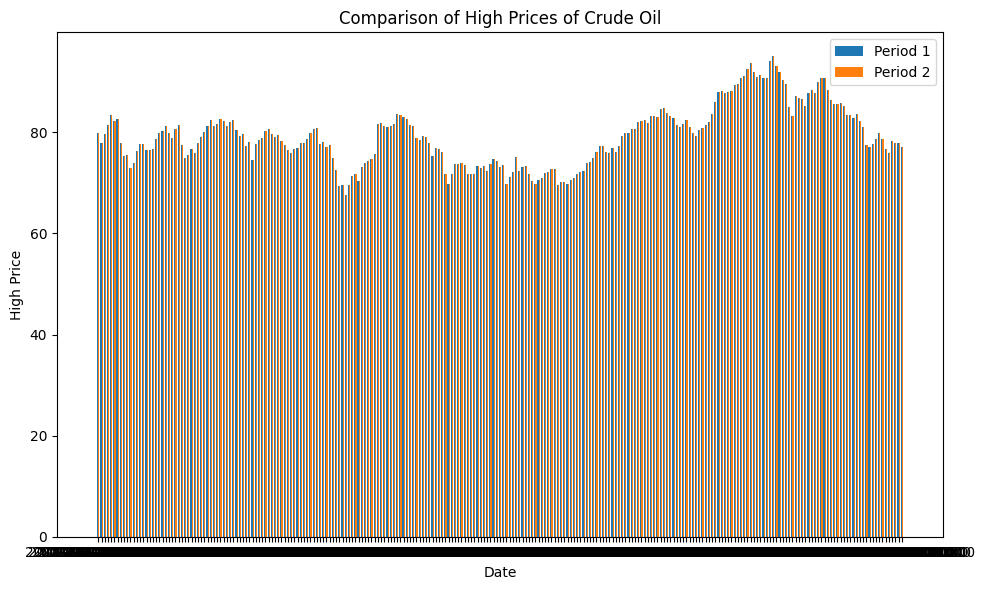

In [14]:
import matplotlib.pyplot as plt

# Assuming df1 and df2 are two DataFrames with crude oil data for comparison
# For example, df1 represents one period, and df2 represents another period or another type of crude oil

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(df))  # Assuming both DataFrames have the same length

plt.bar(index, df['High'], bar_width, label='Period 1')
plt.bar([i + bar_width for i in index], df['High'], bar_width, label='Period 2')

plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('Comparison of High Prices of Crude Oil')
plt.xticks([i + bar_width / 2 for i in index], df['Date'])  # Assuming the Date column is used for x-axis
plt.legend()
plt.tight_layout()
plt.show()


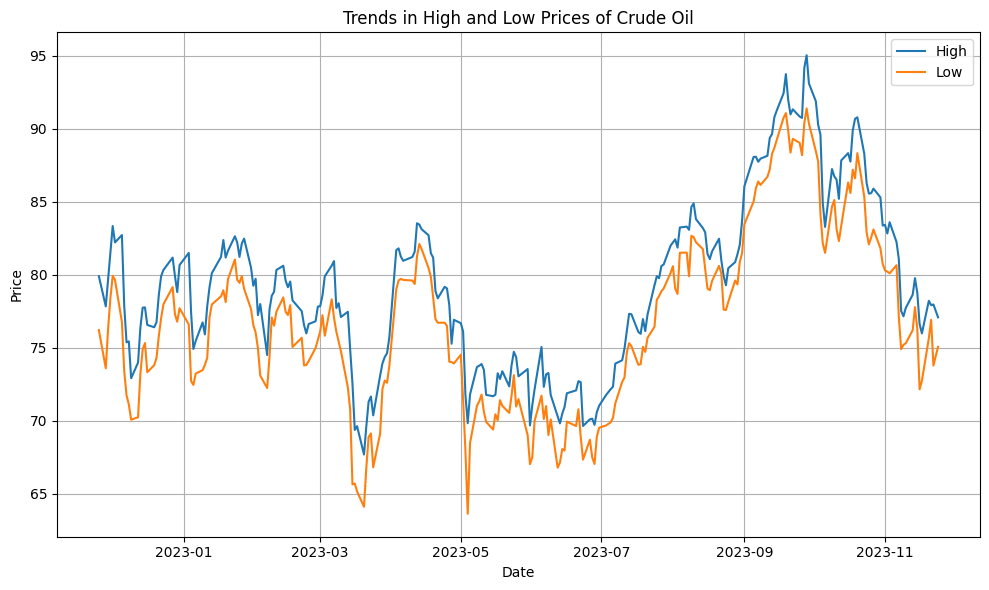

In [15]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing crude oil data with columns: Date, High, Low
plt.figure(figsize=(10, 6))

plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Trends in High and Low Prices of Crude Oil')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
import plotly.graph_objs as go

# Creating a candlestick chart
trace = go.Candlestick(x=df['Date'],
                       open=df['Open'],
                       high=df['High'],
                       low=df['Low'],
                       close=df['Close'])

layout = go.Layout(title='Crude Oil Price Candlestick Chart',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price'))

fig = go.Figure(data=[trace], layout=layout)
fig.show()


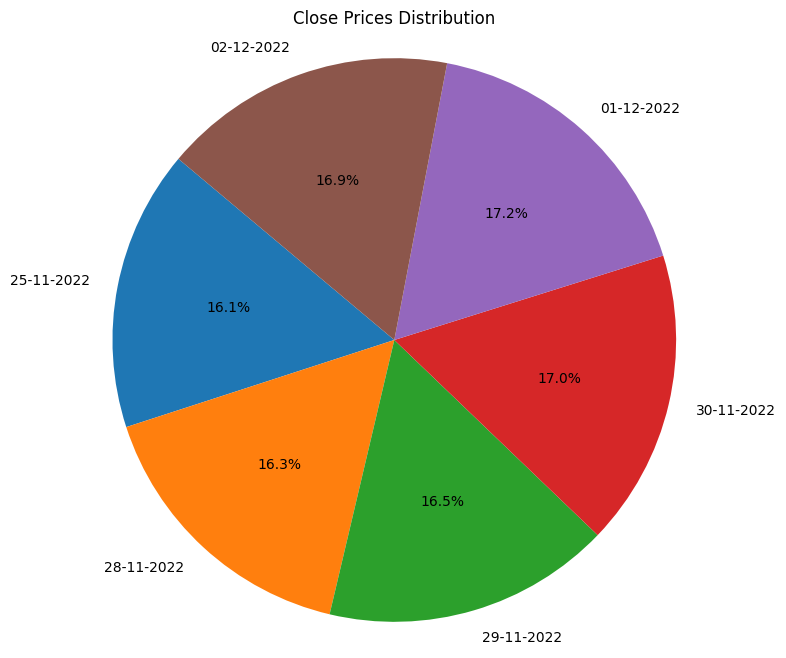

In [17]:
import matplotlib.pyplot as plt

# Sample data for demonstration
dates = [
    "25-11-2022", "28-11-2022", "29-11-2022", "30-11-2022", "01-12-2022", "02-12-2022",
    # ... add more dates as needed
]
close_prices = [
    76.279999, 77.239998, 78.199997, 80.550003, 81.220001, 79.980003,
    # ... add more close prices corresponding to the dates
]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(close_prices, labels=dates, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Close Prices Distribution')
plt.show()


Data preprocessing


In [35]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('/content/Crudeoil.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())

# Impute missing values in numerical columns using mean strategy
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Extract additional date features if needed
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Scale numerical columns
scaler = StandardScaler()
df[numerical_columns + ['Day', 'Month', 'Year']] = scaler.fit_transform(df[numerical_columns + ['Day', 'Month', 'Year']])

# Your preprocessed DataFrame 'df' is ready for further analysis or modeling


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [22]:
# Check for missing values in the dataset
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [43]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
print(df)

          Date      Open      High       Low     Close  Adj Close    Volume  \
0   2022-11-25 -0.098961  0.104418 -0.082078 -0.290815  -0.290815 -0.483063   
1   2022-11-28 -0.369346 -0.251320 -0.523783 -0.125774  -0.125774  0.946766   
2   2022-11-29 -0.264957  0.061246 -0.070277  0.039267   0.039267  0.707770   
3   2022-11-30  0.156021  0.359995  0.285447  0.443274   0.443274 -0.265538   
4   2022-12-01  0.395602  0.698463  0.543389  0.558458   0.558458  0.084207   
..         ...       ...       ...       ...       ...        ...       ...   
246 2023-11-17 -0.875888 -0.570792 -0.667084 -0.357863  -0.357863 -2.185120   
247 2023-11-20 -0.417262 -0.185698 -0.178174 -0.063884  -0.063884 -0.439863   
248 2023-11-21 -0.075003 -0.237504  0.035934 -0.034658  -0.034658 -0.770118   
249 2023-11-22 -0.054469 -0.228870 -0.491750 -0.149843  -0.149843  0.784698   
250 2023-11-24 -0.222175 -0.380836 -0.275956 -0.418034  -0.418034  0.784698   

          Day     Month      Year  
0    1.045313  

In [26]:
# Check the data types of columns in your DataFrame
print(df.dtypes)
from sklearn.impute import SimpleImputer


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [33]:
# Drop rows with any missing values
df.dropna(axis=0, inplace=True)

# Drop columns with any missing values
df.dropna(axis=1, inplace=True)


In [37]:
# Check for missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Day          0
Month        0
Year         0
dtype: int64


In [39]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Assume 'df' is your DataFrame containing the crude oil dataset
# Impute missing values in numerical columns using mean strategy
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Print the DataFrame after imputation
print(df)


          Date      Open      High       Low     Close  Adj Close    Volume  \
0   2022-11-25 -0.098961  0.104418 -0.082078 -0.290815  -0.290815 -0.483063   
1   2022-11-28 -0.369346 -0.251320 -0.523783 -0.125774  -0.125774  0.946766   
2   2022-11-29 -0.264957  0.061246 -0.070277  0.039267   0.039267  0.707770   
3   2022-11-30  0.156021  0.359995  0.285447  0.443274   0.443274 -0.265538   
4   2022-12-01  0.395602  0.698463  0.543389  0.558458   0.558458  0.084207   
..         ...       ...       ...       ...       ...        ...       ...   
246 2023-11-17 -0.875888 -0.570792 -0.667084 -0.357863  -0.357863 -2.185120   
247 2023-11-20 -0.417262 -0.185698 -0.178174 -0.063884  -0.063884 -0.439863   
248 2023-11-21 -0.075003 -0.237504  0.035934 -0.034658  -0.034658 -0.770118   
249 2023-11-22 -0.054469 -0.228870 -0.491750 -0.149843  -0.149843  0.784698   
250 2023-11-24 -0.222175 -0.380836 -0.275956 -0.418034  -0.418034  0.784698   

          Day     Month      Year  
0    1.045313  

In [40]:
# Assuming 'Date' is in datetime format in your DataFrame 'df'
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Print the DataFrame with additional date features
print(df)


          Date      Open      High       Low     Close  Adj Close    Volume  \
0   2022-11-25 -0.098961  0.104418 -0.082078 -0.290815  -0.290815 -0.483063   
1   2022-11-28 -0.369346 -0.251320 -0.523783 -0.125774  -0.125774  0.946766   
2   2022-11-29 -0.264957  0.061246 -0.070277  0.039267   0.039267  0.707770   
3   2022-11-30  0.156021  0.359995  0.285447  0.443274   0.443274 -0.265538   
4   2022-12-01  0.395602  0.698463  0.543389  0.558458   0.558458  0.084207   
..         ...       ...       ...       ...       ...        ...       ...   
246 2023-11-17 -0.875888 -0.570792 -0.667084 -0.357863  -0.357863 -2.185120   
247 2023-11-20 -0.417262 -0.185698 -0.178174 -0.063884  -0.063884 -0.439863   
248 2023-11-21 -0.075003 -0.237504  0.035934 -0.034658  -0.034658 -0.770118   
249 2023-11-22 -0.054469 -0.228870 -0.491750 -0.149843  -0.149843  0.784698   
250 2023-11-24 -0.222175 -0.380836 -0.275956 -0.418034  -0.418034  0.784698   

     Day  Month  Year  
0     25     11  2022  
1  

In [42]:
# Scale numerical columns
scaler = StandardScaler()
df[numerical_columns + ['Day', 'Month', 'Year']] = scaler.fit_transform(df[numerical_columns + ['Day', 'Month', 'Year']])
print(df)

# Your preprocessed DataFrame 'df' is ready for further analysis or modeling


          Date      Open      High       Low     Close  Adj Close    Volume  \
0   2022-11-25 -0.098961  0.104418 -0.082078 -0.290815  -0.290815 -0.483063   
1   2022-11-28 -0.369346 -0.251320 -0.523783 -0.125774  -0.125774  0.946766   
2   2022-11-29 -0.264957  0.061246 -0.070277  0.039267   0.039267  0.707770   
3   2022-11-30  0.156021  0.359995  0.285447  0.443274   0.443274 -0.265538   
4   2022-12-01  0.395602  0.698463  0.543389  0.558458   0.558458  0.084207   
..         ...       ...       ...       ...       ...        ...       ...   
246 2023-11-17 -0.875888 -0.570792 -0.667084 -0.357863  -0.357863 -2.185120   
247 2023-11-20 -0.417262 -0.185698 -0.178174 -0.063884  -0.063884 -0.439863   
248 2023-11-21 -0.075003 -0.237504  0.035934 -0.034658  -0.034658 -0.770118   
249 2023-11-22 -0.054469 -0.228870 -0.491750 -0.149843  -0.149843  0.784698   
250 2023-11-24 -0.222175 -0.380836 -0.275956 -0.418034  -0.418034  0.784698   

          Day     Month      Year  
0    1.045313  